In [1]:
#imporint the necessary libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the  dataset
df_doc=pd.read_excel("D:/Final_Train.xlsx")



# Attributes:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [3]:
df_doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
#lets see the columns
df_doc.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [5]:
#Checking the shape of the final dataset
df_doc.shape

(5961, 7)

In [6]:
#checking the information
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Observation:
    
    We can see above that some NaN values are present

In [7]:
df_doc["Place"].fillna(df_doc["Place"].mode(),inplace=True)
df_doc["Place"] = df_doc["Place"].str.split(",")
df_doc["City"] = df_doc["Place"].str[-1]
df_doc["Place"] = df_doc["Place"].str[0]

In [8]:
#lets make multiple columns for Qualification columns
df_doc["Qualification"]=df_doc["Qualification"].str.split(",")
Qualification ={}
for x in df_doc["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [9]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])

In [10]:
    for title in final_qua:
        df_doc[title]=0    
    for x,y in zip(df_doc["Qualification"].values,np.array([idx for idx in range(len(df_doc))])):
        for q in x:
            q = q.strip()
            if q in final_qua:
                df_doc[q][y] = 1
            

In [11]:
df_doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24 years experience,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12 years experience,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9 years experience,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12 years experience,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20 years experience,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"[MBBS, MS - ENT]",19 years experience,98%,Basavanagudi,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,1,0,0,0,0,1,0,0,0,0
5957,[MBBS],33 years experience,NaN,Nungambakkam,General Medicine,NaN,100,Chennai,1,0,0,0,0,0,0,0,0,0
5958,[MBBS],41 years experience,97%,Greater Kailash Part 2,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,1,0,0,0,0,0,0,0,0,0
5959,"[MBBS, MD - General Medicine]",15 years experience,90%,Vileparle West,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,1,0,0,0,0,0,0,1,0,0


In [12]:
#checking the shape of dataset
df_doc.shape

(5961, 18)

In [13]:
#lets strip  of " years experience" from df_doc["Experience"]
df_doc["Experience"]=df_doc["Experience"].str.strip(" years experience").astype(int)
df_doc["Experience"].head(15)


0     24
1     12
2      9
3     12
4     20
5      8
6     42
7     10
8     14
9     23
10     5
11     7
12     9
13    21
14    12
Name: Experience, dtype: int32

In [14]:
#lets strip  of " %" from df_doc["Experience"]
df_doc["Rating"]=df_doc["Rating"].str.strip(" %").astype(float)
df_doc["Rating"].head(15)

0     100.0
1      98.0
2       NaN
3       NaN
4     100.0
5       NaN
6       NaN
7      99.0
8       NaN
9       NaN
10      NaN
11      NaN
12     98.0
13      NaN
14      NaN
Name: Rating, dtype: float64

In [15]:
print(df_doc["Rating"].dtypes)

float64


In [16]:
#we are craete Multiple columns for Qualification so we can drop the column
df_doc.drop("Qualification",axis=1,inplace=True)

In [17]:
#we can drop the Miscellaneous_Info  columns because These data are use less for us

df_doc.drop("Miscellaneous_Info",axis=1,inplace=True)

In [18]:
#checking the shape of dataset
df_doc.shape

(5961, 16)

# Handelling the missing values

In [19]:
#checking the NaN values
df_doc.isnull().values.any()

True

Observation:
    It means there are NaN values are present. 

In [20]:
#Lets check columns wise
df_doc.isnull().sum()

Experience                                 0
Rating                                  3302
Place                                     25
Profile                                    0
Fees                                       0
City                                      25
MBBS                                       0
BDS                                        0
BAMS                                       0
BHMS                                       0
MD - Dermatology                           0
MS - ENT                                   0
Venereology & Leprosy                      0
MD - General Medicine                      0
Diploma in Otorhinolaryngology (DLO)       0
MD - Homeopathy                            0
dtype: int64

Observation:
    
    1►There are 4392 NaN values are present inside the Rating column.
    
    2►3454 NaN values are present inside the  Miscellaneous_Info column.
    
    3►1987 NaN values Are present inside the Fees column.
    
    4►similarly 31 NaN values are present inside the place columns.
     

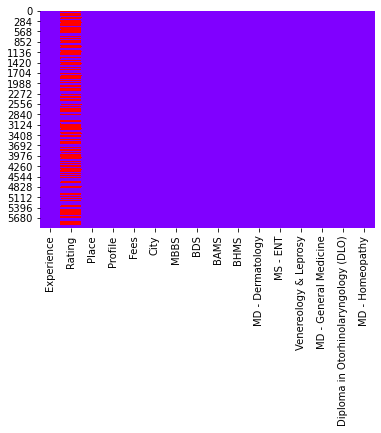

In [21]:
#For better visualization lets plot with Heatmap
sns.heatmap(df_doc.isnull(),cbar=False,cmap='rainbow')

In [22]:
#lets convert the df_doc["Rating"] to numeric 
df_doc["Rating"]=df_doc["Rating"].astype(float)
df_doc.dtypes

Experience                                int32
Rating                                  float64
Place                                    object
Profile                                  object
Fees                                      int64
City                                     object
MBBS                                      int64
BDS                                       int64
BAMS                                      int64
BHMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

In [23]:
#Lets replace the null values in rating with 0.
df_doc["Rating"].fillna(0,inplace=True)

In [24]:
#Lets go for Place column
df_doc['Place'].value_counts()

HSR Layout          75
Andheri West        70
Dwarka              68
Banjara Hills       64
Mulund West         54
                    ..
Sion Koliwada        1
Ramachandrapuram     1
Vigyan Vihar         1
Rohini Sector 8      1
Rohini Sector 24     1
Name: Place, Length: 866, dtype: int64

Observation:
    
    Most of the doctors are located in HSR Layout, Bangalore. and Andheri West.

In [25]:
#Replacing the nan value 0 and unkwon
d=df_doc.columns
for f in d:
    if df_doc[f].dtypes!='object':
        df_doc[f].fillna(0,inplace=True)
    if df_doc[f].dtypes=='object':
        df_doc[f].fillna("unknown",inplace=True)

In [26]:
df_doc.isnull().sum()

Experience                              0
Rating                                  0
Place                                   0
Profile                                 0
Fees                                    0
City                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
dtype: int64

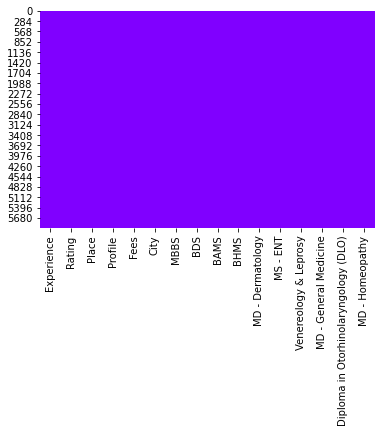

In [27]:
#For better visualization lets plot with Heatmap
sns.heatmap(df_doc.isnull(),cbar=False,cmap='rainbow')

Observation:
    
    Now we can see that we don't have any NaN value inside this data set.

In [28]:
#value counts of objectives data
c=df_doc.columns
for i in c:
    if df_doc[i].dtypes=='object':
        print(df_doc[i].value_counts())
        print("♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣")

HSR Layout          75
Andheri West        70
Dwarka              68
Banjara Hills       64
Mulund West         54
                    ..
Sion Koliwada        1
Ramachandrapuram     1
Vigyan Vihar         1
Rohini Sector 8      1
Rohini Sector 24     1
Name: Place, Length: 867, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣
Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣
 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
unknown                  25
e                         1
Name: City, dtype: int64
♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣♣


# Statistic Summary

In [29]:
df_doc.describe()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640,0.470559,0.228485,0.127831,0.125482,0.101493,0.068948,0.049153,0.047811,0.041772,0.030364
std,11.142798,47.340934,190.920373,0.499174,0.419892,0.333929,0.331293,0.302006,0.253387,0.216205,0.213384,0.200083,0.171601
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,96.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,100.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation:
    
    1►min rating is 0 and maximum rating is 100.
    
    2► Minimum Fees is 5 maximum Fees is 950
    
    3►Minimum Experience is 0 years and maximum experience is 66 years
    
    3►There is huge Difference between 75% Quartile of Fees to maximum value of Fees and Experience,
      It means may be some outliers are present inside the Fees column.

# Correlation

In [30]:
docr=df_doc.corr()

In [31]:
docr

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
Experience,1.000000,-0.038569,0.002117,0.271347,-0.196268,-0.047150,-0.114191,-0.067704,0.093778,-0.120213,0.097549,0.111103,0.008510
Rating,-0.038569,1.000000,0.153273,0.004911,0.230601,-0.155166,-0.094458,0.116165,-0.013572,0.068675,-0.038450,-0.010701,-0.000812
Fees,0.002117,0.153273,1.000000,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,0.040921,0.011560,0.018601
MBBS,0.271347,0.004911,0.271038,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,0.220358,0.206347,-0.164871
BDS,-0.196268,0.230601,-0.198635,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,-0.121943,-0.113622,-0.096301
BAMS,-0.047150,-0.155166,-0.139891,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,-0.078722,-0.079932,-0.067747
BHMS,-0.114191,-0.094458,-0.002423,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,-0.077760,-0.079088,0.349109
MD - Dermatology,-0.067704,0.116165,0.163811,0.314207,-0.182900,-0.128669,-0.127311,1.000000,-0.091460,0.637946,-0.075311,-0.064618,-0.059475
MS - ENT,0.093778,-0.013572,0.128413,0.263449,-0.148092,-0.104182,-0.103082,-0.091460,1.000000,-0.061872,-0.060978,0.168226,-0.048156
Venereology & Leprosy,-0.120213,0.068675,0.113091,0.213185,-0.123730,-0.087044,-0.086124,0.637946,-0.061872,1.000000,-0.050947,-0.039713,-0.040234


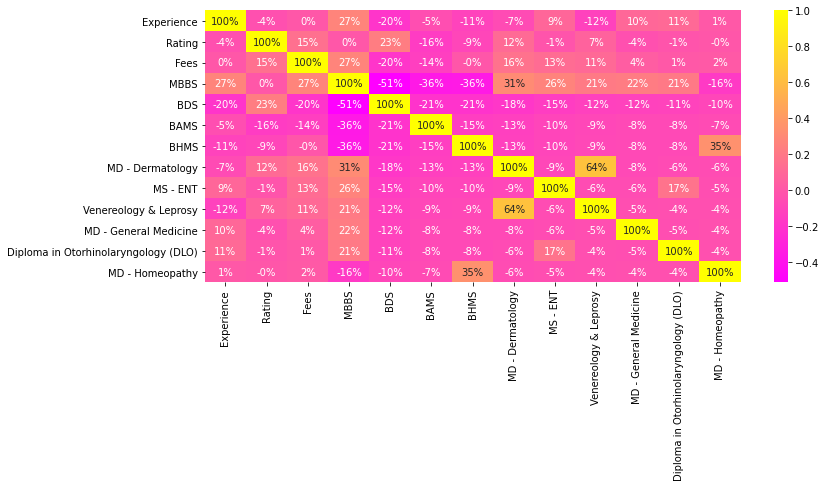

In [32]:
#lets plot the correlation with heat map()
plt.figure(figsize=[12,5])
sns.heatmap(docr,annot=True,fmt='.0%',cmap='spring')

Observation:
    
  Venereology is highly correlated with MD Demartology.
  
  MD Homeopathy is highly correlated with BAMS
  
  

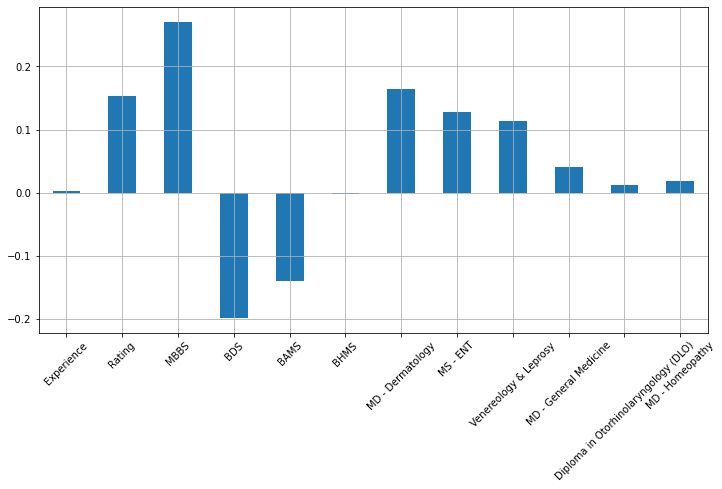

In [33]:
#correlation with target 
plt.figure(figsize=[12,6])
df_doc.drop('Fees',axis=1).corrwith(df_doc['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation=45)
plt.show()

In [34]:
#dropping the columns which are not correlated with target(fees)
df_doc.drop(['BDS','BAMS','BHMS','Experience'],axis=1,inplace=True)

# Outliers

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Text major ticklabel objects>)

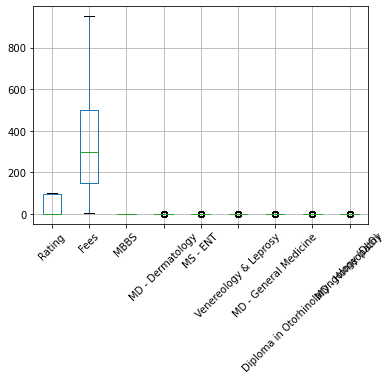

In [35]:
df_doc.boxplot()
plt.xticks(rotation=45)

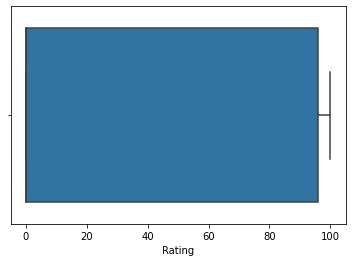

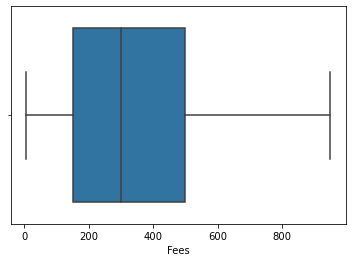

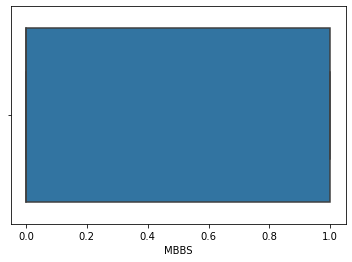

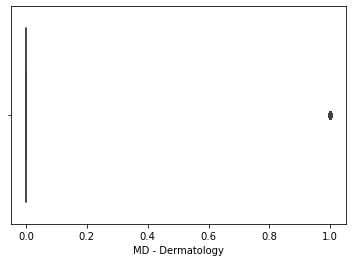

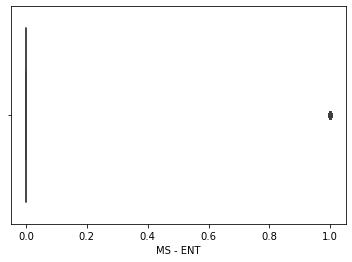

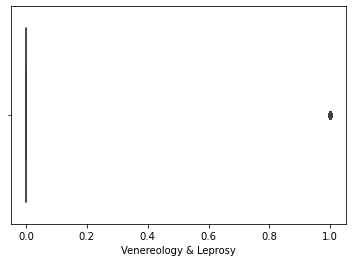

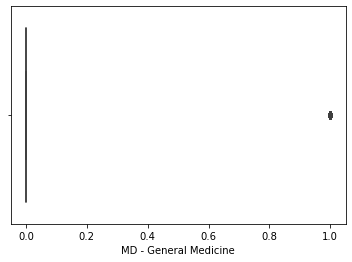

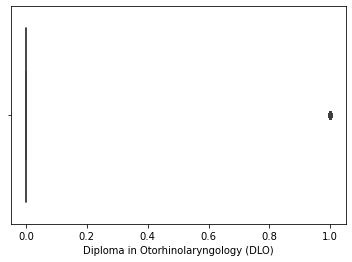

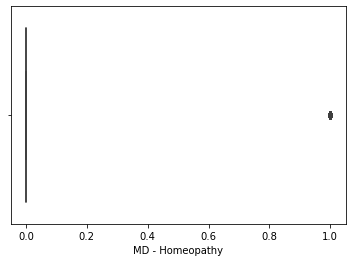

In [36]:
d=df_doc.columns
for i in d:
    if df_doc[i].dtypes!='object':
        sns.boxplot(df_doc[i])
        plt.show()

Observation:
    
    We can see In Experience and Fees columns we have some outliers

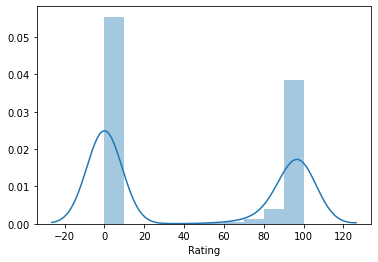

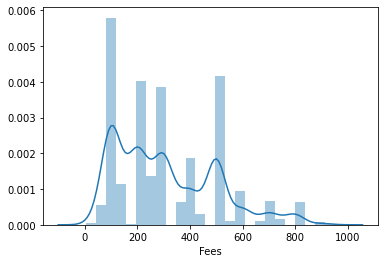

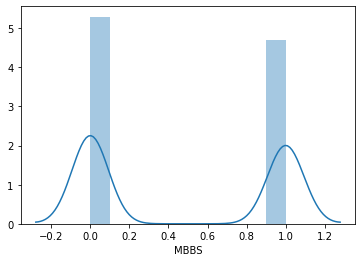

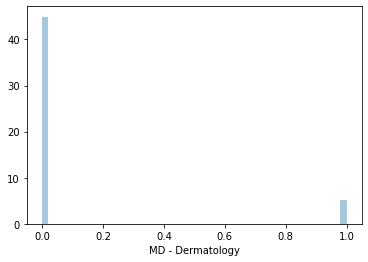

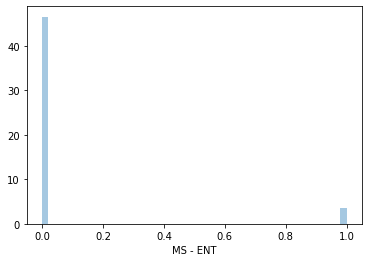

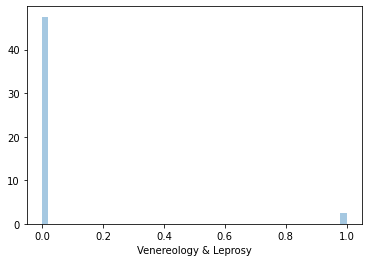

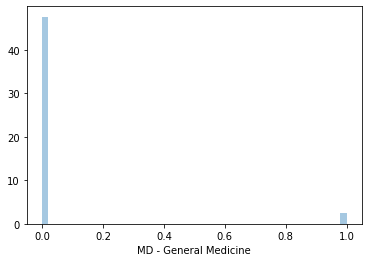

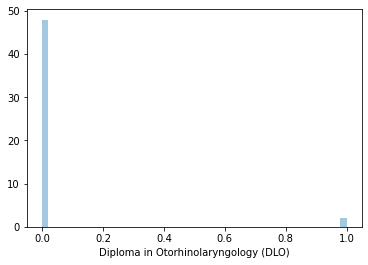

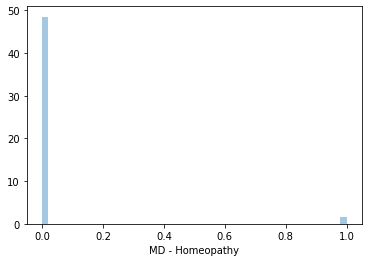

In [37]:
d=df_doc.columns
for i in d:
    if df_doc[i].dtypes!='object':
        sns.distplot(df_doc[i])
        plt.show()

# Univariate Analysis

# Rating

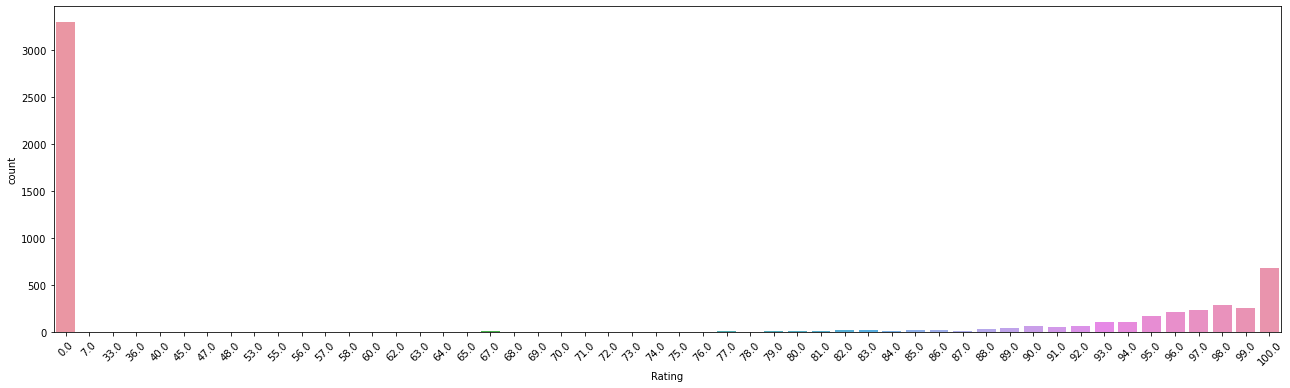

0.0      3302
100.0     684
98.0      290
99.0      259
97.0      241
96.0      220
95.0      178
94.0      115
93.0      109
90.0       66
92.0       66
91.0       60
89.0       42
88.0       41
85.0       27
82.0       23
86.0       21
83.0       21
80.0       19
77.0       16
87.0       14
84.0       13
79.0       13
81.0       12
67.0       12
76.0        9
71.0        9
73.0        8
75.0        8
74.0        7
60.0        7
78.0        6
56.0        5
68.0        5
70.0        4
69.0        4
72.0        3
57.0        3
64.0        2
55.0        2
62.0        2
63.0        2
33.0        2
36.0        1
45.0        1
53.0        1
48.0        1
58.0        1
7.0         1
40.0        1
47.0        1
65.0        1
Name: Rating, dtype: int64


In [38]:
d=df_doc["Rating"].value_counts()
plt.figure(figsize=[22,6])
sns.countplot(x='Rating',data=df_doc)
plt.xticks(rotation=45)
plt.show()
print(d)

Observation:
    
  
    
    only 907 doctors are have 100 % raating

# Profile

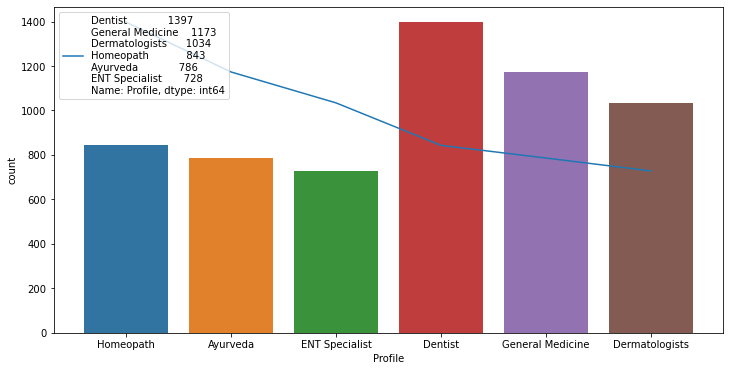

In [39]:
plt.figure(figsize=[12,6])
d=df_doc["Profile"].value_counts()
sns.countplot(x="Profile",data=df_doc)
plt.plot(d, label=d)
plt.legend(loc='upper left')
plt.show()



Observation:
    
    ►In our data set most are the doctors are from Dentist profile with the huge number of 1838.
    
    ►1617 General Medicine doctors are present.
    
    ►963 ENT specialist are present.
    
    
    

# Fees

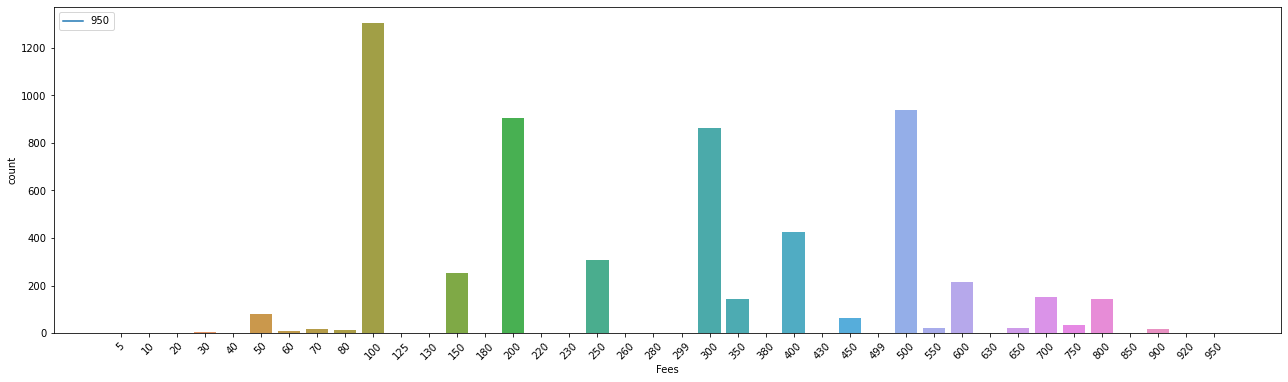


100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [40]:
m=df_doc["Fees"].max()
d=df_doc["Fees"].value_counts()
plt.figure(figsize=[22,6])
sns.countplot(x='Fees',data=df_doc)
plt.xticks(rotation=45)
plt.plot(m, label=m)
plt.legend(loc='upper left')
plt.show()
print()
print(d)


Observation :
    
    ► 1306 doctor's fees is 100.
    
    ►only one doctor's highest fees is 950.
    
    ►only one doctor's lowest fees is 5.
    

# City

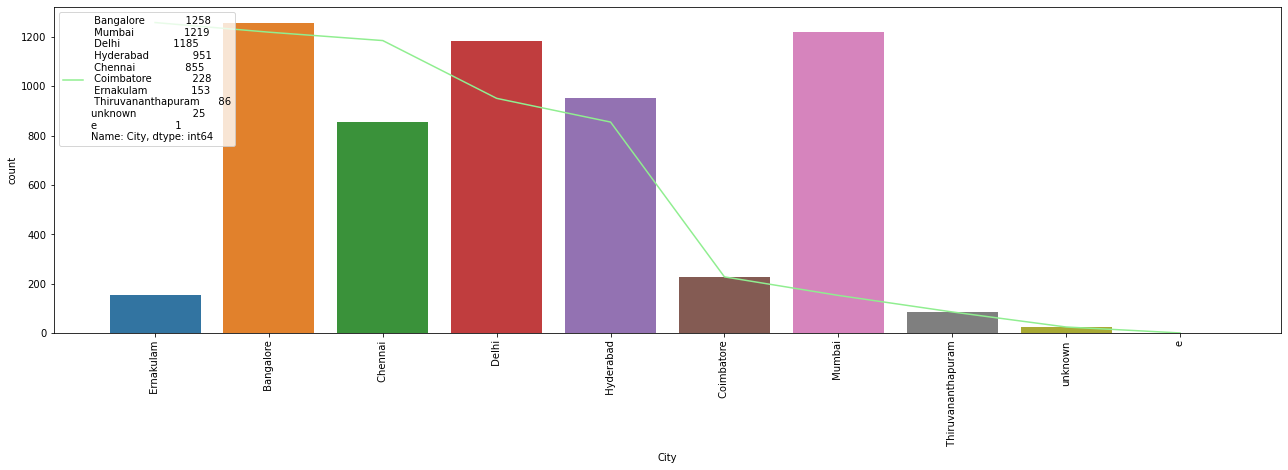


 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
unknown                  25
e                         1
Name: City, dtype: int64


In [41]:

d=df_doc["City"].value_counts()
plt.figure(figsize=[22,6])
sns.countplot(x='City',data=df_doc)
plt.xticks(rotation=90)
plt.plot(d, label=d,color='lightgreen')
plt.legend(loc='upper left')
plt.show()
print()
print(d)

Observation:
    
    ►1709 Doctors are from Banglore city.
    
    ►1608 Doctors are from Mumbai city.
    
    ►1602 Doctors are  from Delhi city

# Bivariate analysis

# Rating vs Fees

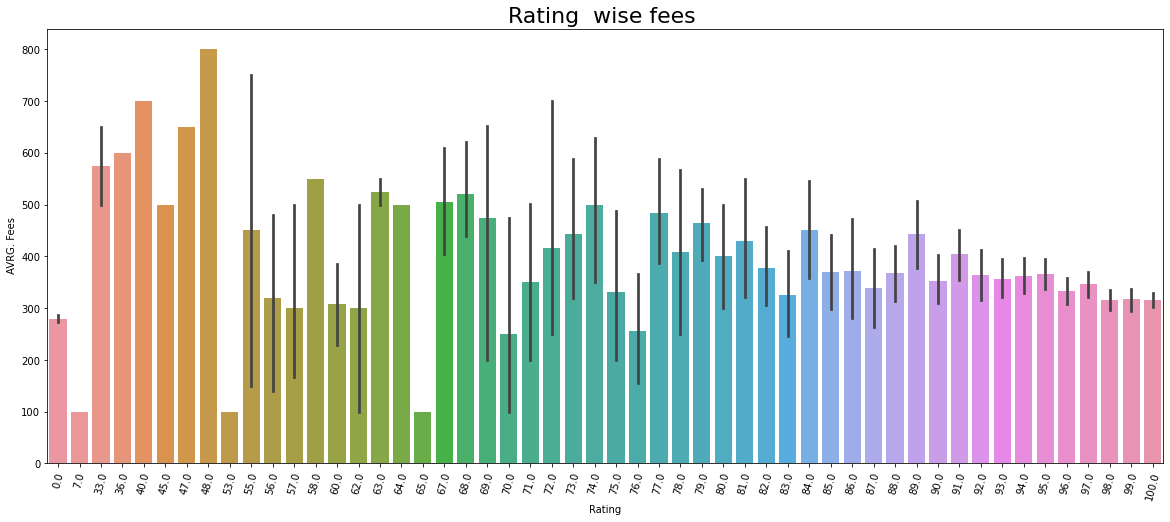

In [42]:
plt.figure(figsize=[20,8])
sns.barplot(x="Rating",y="Fees",data=df_doc)
plt.xlabel("Rating")
plt.ylabel(" AVRG. Fees")
plt.title("Rating  wise fees ",{"fontsize":22})
plt.xticks(rotation=75)
plt.show()

Observation:
    
    ► When the Doctors Rating is below 50 and above  10,then the Doctors  Avrg Fees are 500 or more than 500.
    
    ► When the Doctors Rating is 96 or more than 96,Then  Doctors Avrg.Fees is 300.

# Profile vs Fees

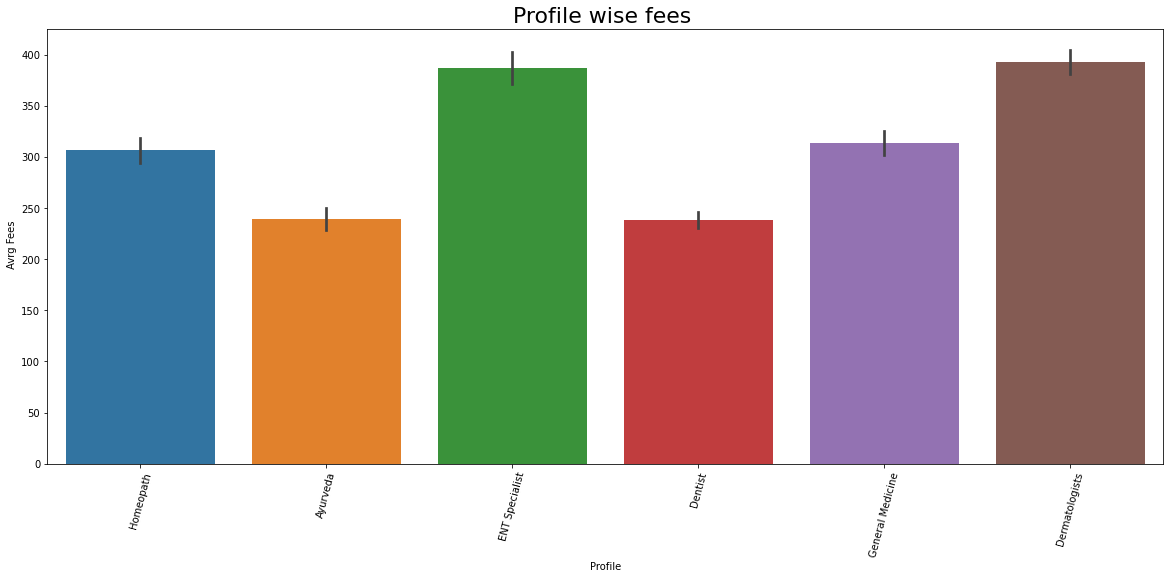

In [43]:
plt.figure(figsize=[20,8])
sns.barplot(x="Profile",y="Fees",data=df_doc)
plt.xlabel("Profile")
plt.ylabel(" Avrg Fees")
plt.title("Profile wise fees ",{"fontsize":22})
plt.xticks(rotation=75)
plt.show()

Observation:
    
    ►ENT Specialist Doctors Avrg fees is more than 350.
    
    ►Dramatologistis Doctors Avrg fees is more than 350.
    
    ►Ayurveda and Dentist Doctors avrg fees is 250.
    
    ►Homeopath and Genral Medicine Doctors avrg fees is 300.

# Q vs Fees

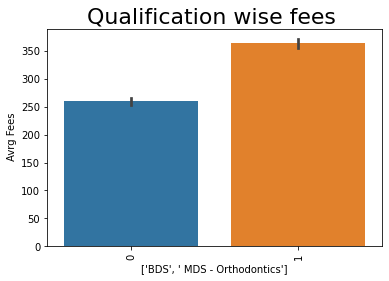

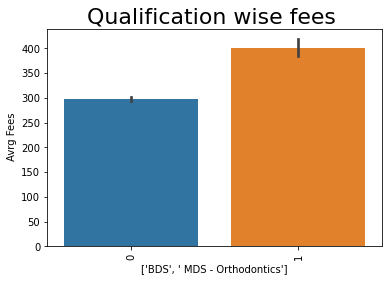

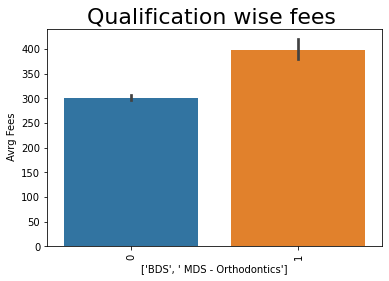

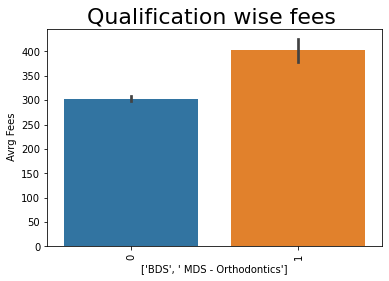

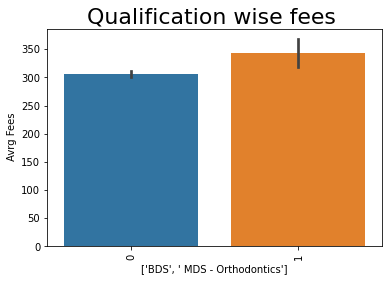

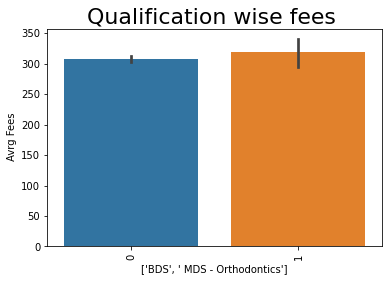

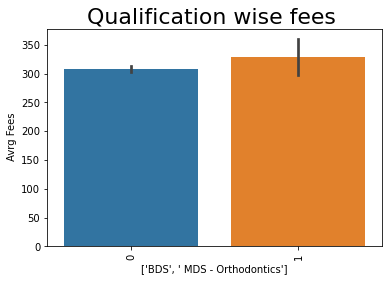

In [44]:
Q=['MBBS','MD - Dermatology','MS - ENT','Venereology & Leprosy',
   'MD - General Medicine','Diploma in Otorhinolaryngology (DLO)','MD - Homeopathy']
for i in Q:
    sns.barplot(x=df_doc[i],y="Fees",data=df_doc)
    plt.xlabel(x)
    plt.ylabel(" Avrg Fees")
    plt.title("Qualification wise fees ",{"fontsize":22})
    plt.xticks(rotation=90)
    plt.show()

# City vs Fees

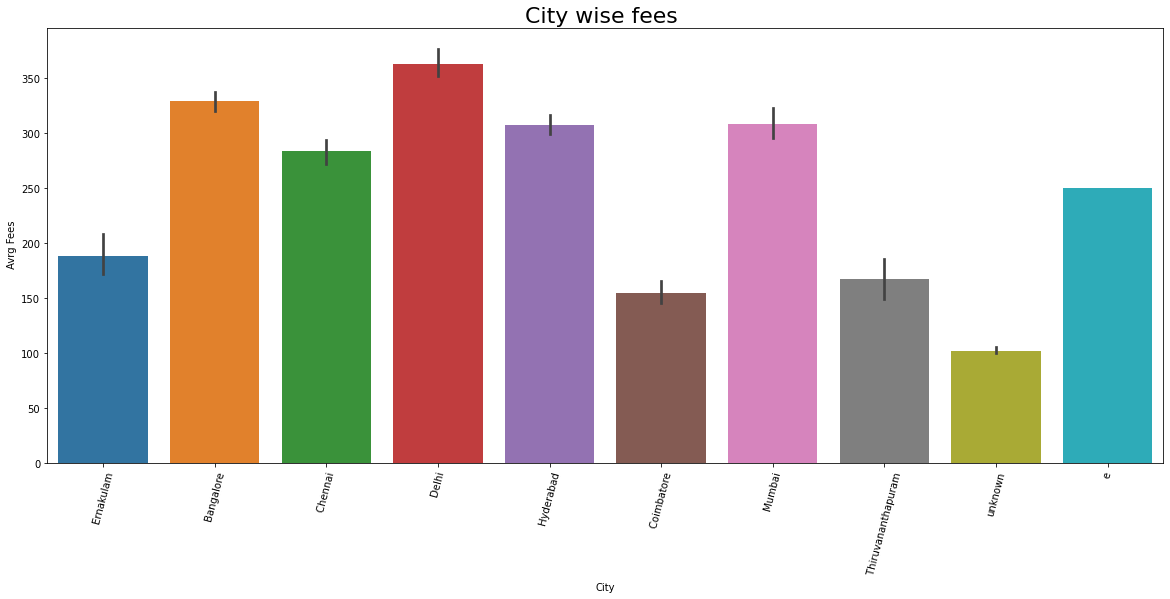

In [45]:
plt.figure(figsize=[20,8])
sns.barplot(x="City",y="Fees",data=df_doc)
plt.xlabel("City")
plt.ylabel(" Avrg Fees")
plt.title("City wise fees ",{"fontsize":22})
plt.xticks(rotation=75)
plt.show()

Observation:
    
    ►In Delhi city Doctors  fees Avrg price is 350.
    
    ►320 Avrg price of doctors  fees in Banglore
    
    ►In Thiruvanathapuram and coimbatore  city Doctors Avrg, fees is nearby 200.

# Multivariet analysis

Text(0.5, 1.0, 'City and Profile  wise Fees')

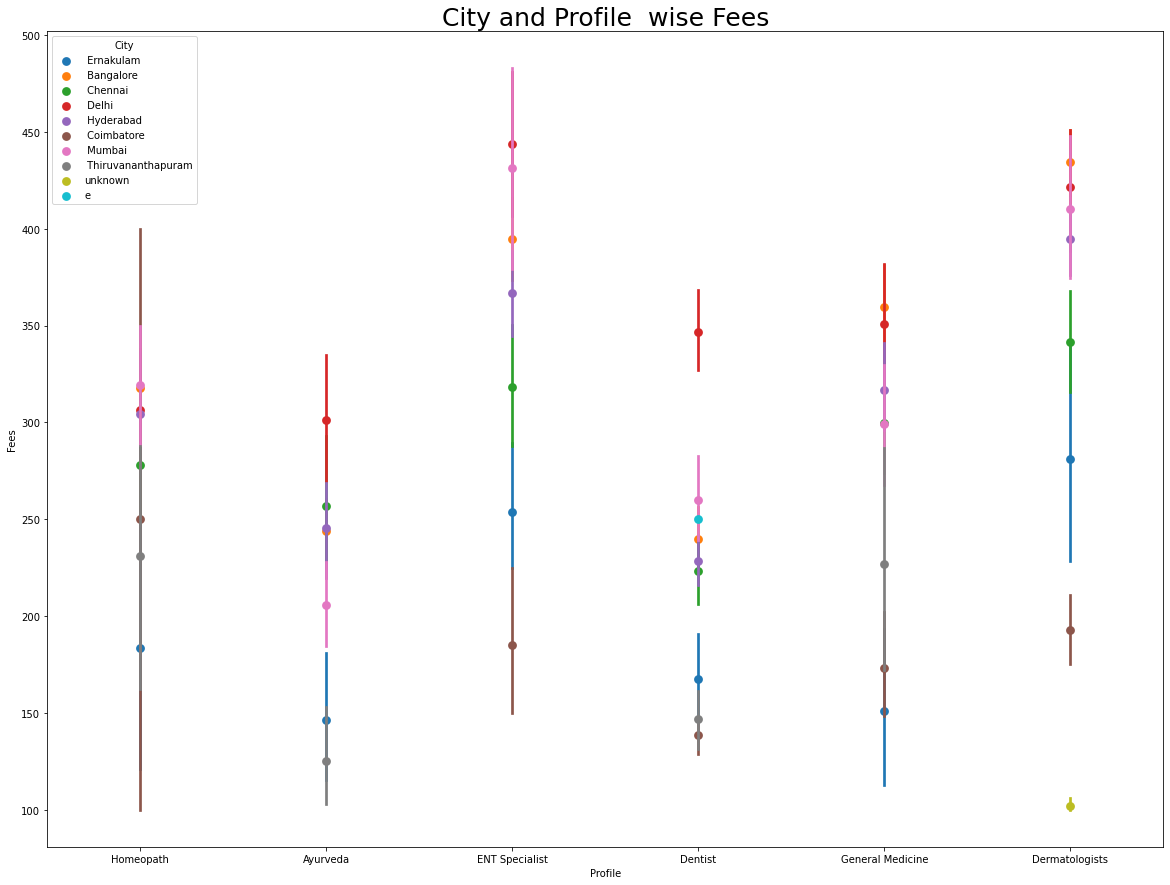

In [46]:
plt.figure(figsize=[20,15])
sns.pointplot(x='Profile',y='Fees',data=df_doc,hue='City', join=False)
plt.title('City and Profile  wise Fees',{"fontsize":25})

Observation:
    
    ►In Delhi city ENT Specialist's avrg price is high.
    
    ►In Mmbai City Homeopath doctorss Avrg fees is high.
    
    ►Ayurveda Doctors highest Avrg. fees in Delhi.
    
    ►Dentist Doctors highest Avrg. fees in Delhi.
    
    ►GeneralMedicine  Doctors highest Avrg. fees in Banglore.
    

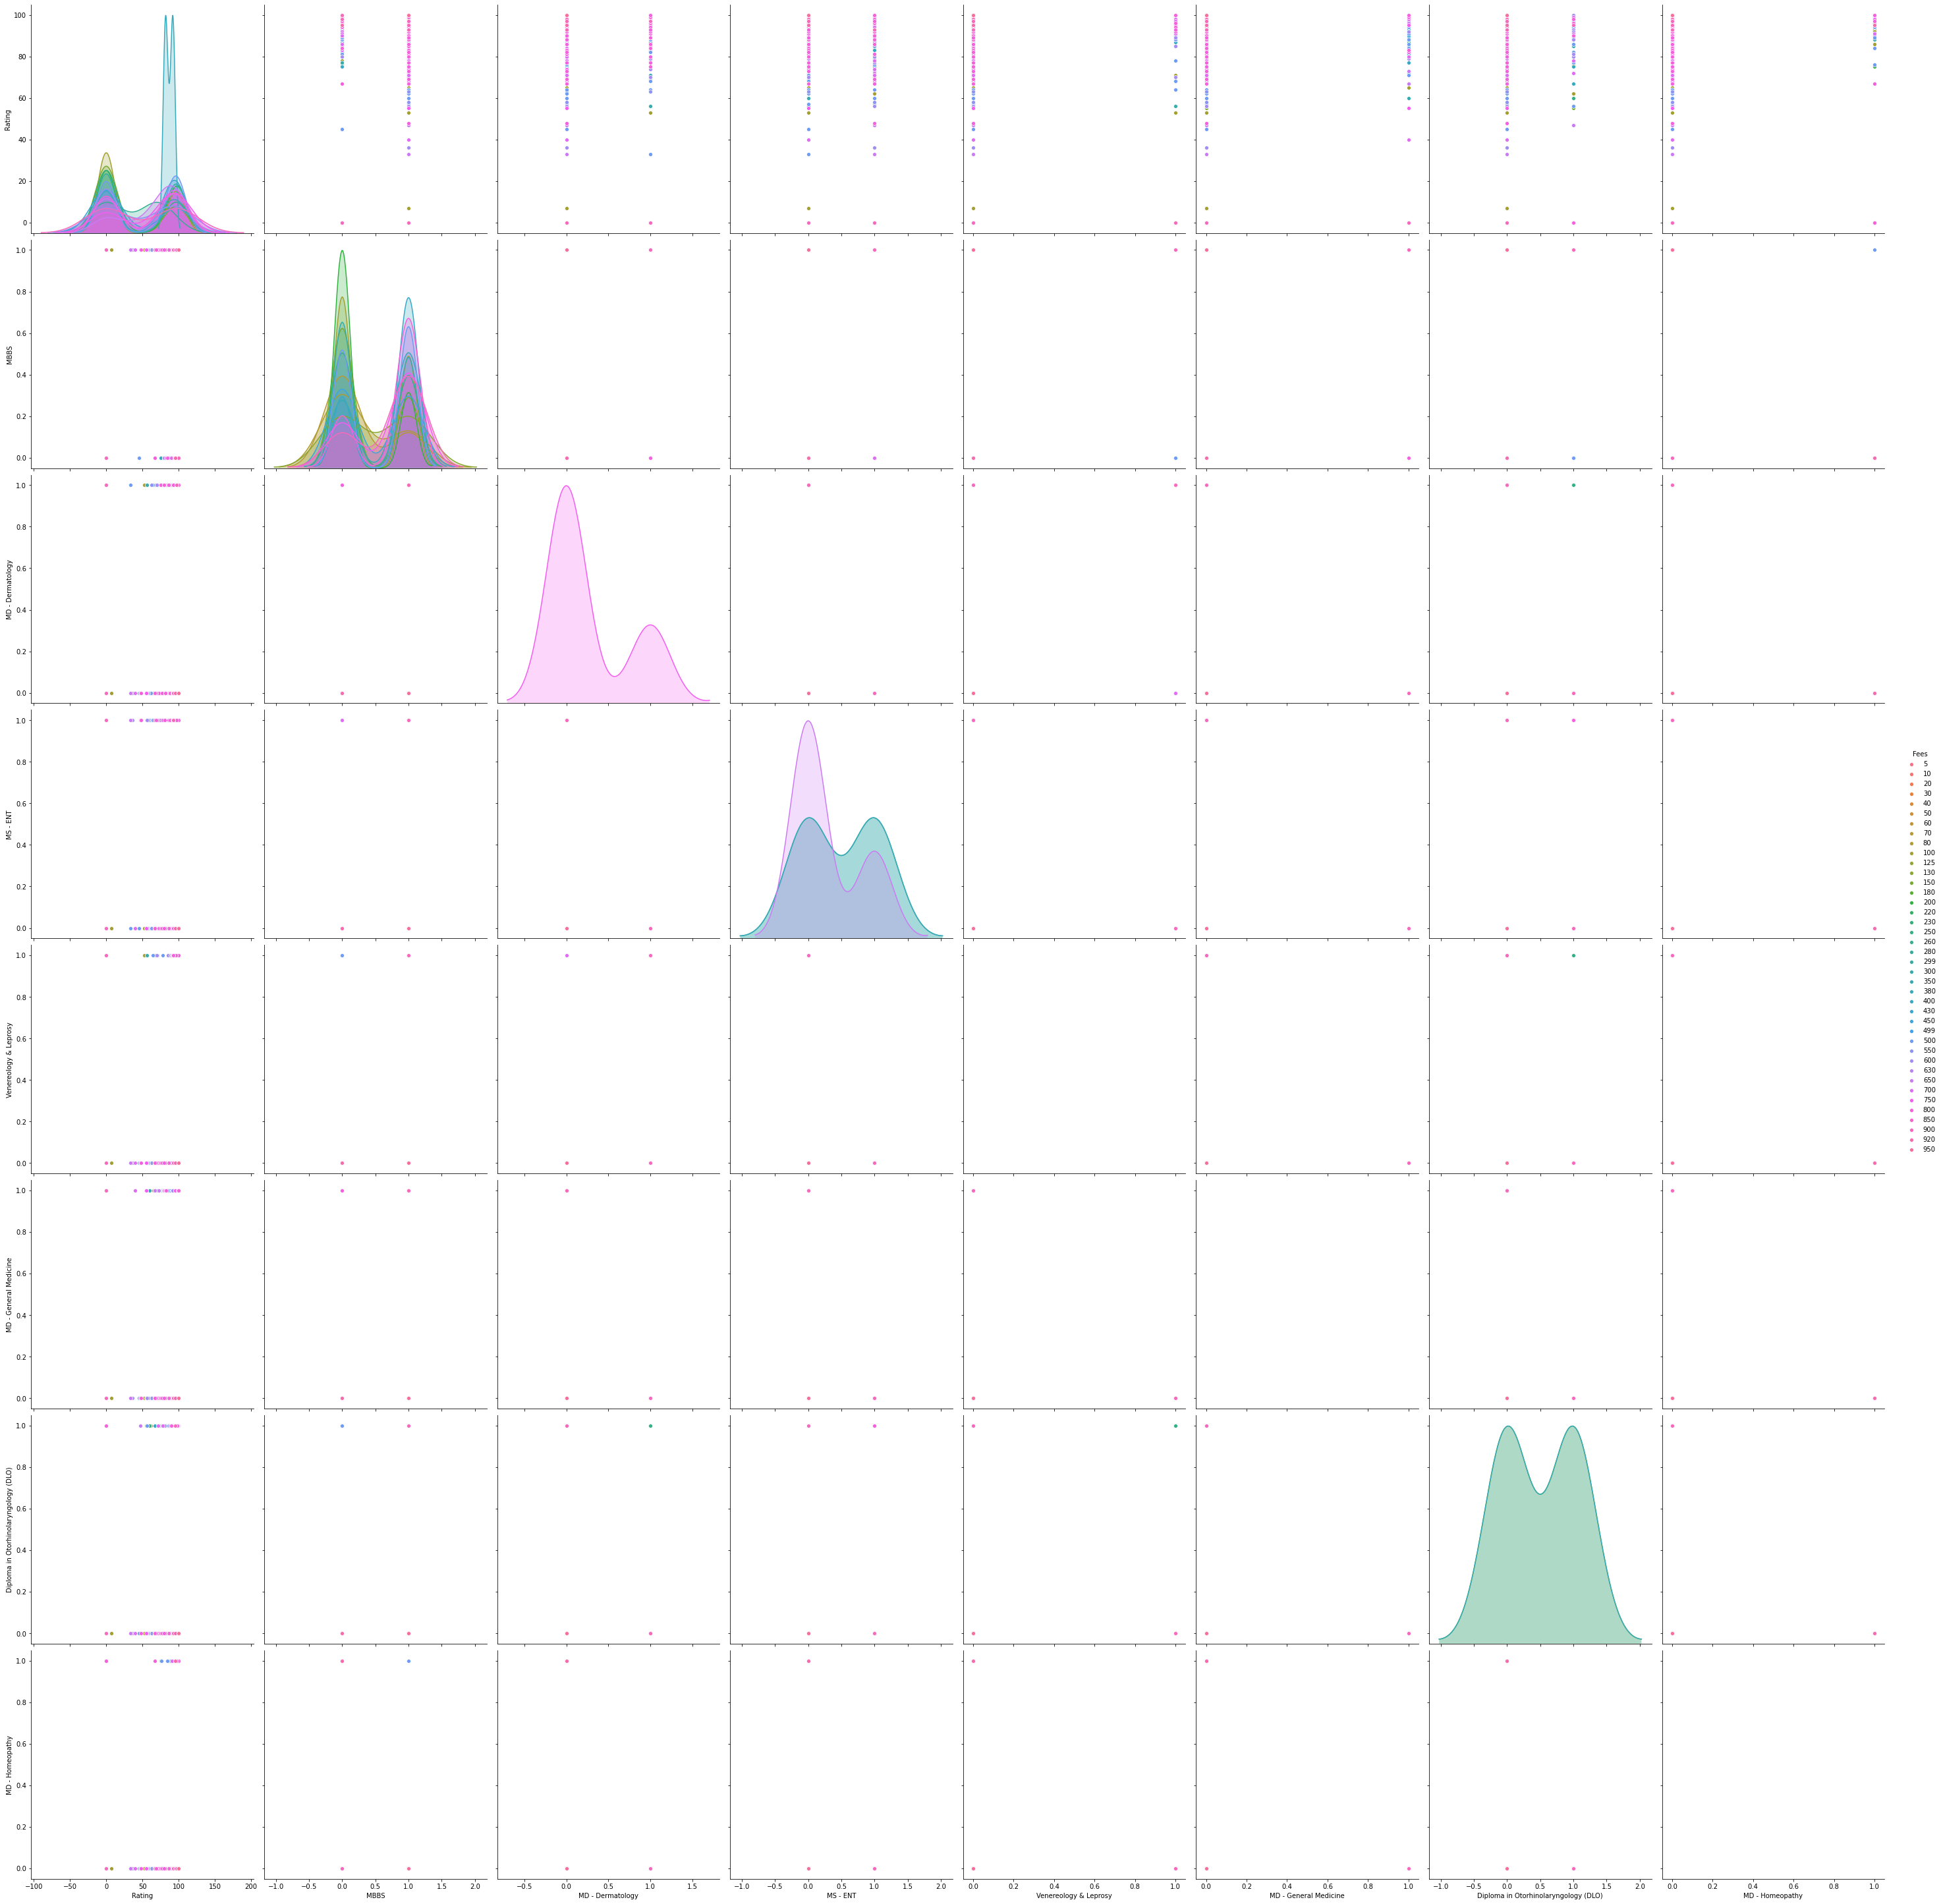

In [47]:
sns.pairplot(df_doc,hue='Fees',size=5)

In [48]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df_doc.columns
for i in d:
    if df_doc[i].dtypes=='object':
        df_doc[i]=l.fit_transform(df_doc[i])


In [49]:
df_doc.dtypes

Rating                                  float64
Place                                     int32
Profile                                   int32
Fees                                      int64
City                                      int32
MBBS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

In [50]:
#spliting the data into train and test variable
df_x=df_doc.drop(columns='Fees',axis=1)
y=df_doc[["Fees"]]

In [51]:
#checking the shape of train data and test data
print(df_x.shape,y.shape)

(5961, 11) (5961, 1)


In [52]:
#scalling the data with Standard scaller
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.shape

(5961, 11)

# Model Building

In [62]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [57]:

LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor(n_neighbors=53)
SV=SVR()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)
XGR=XGBRegressor(random_state=97)
ext=ExtraTreesRegressor(random_state=97)

In [58]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('SVR',SV))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))
models.append(('ExtraTreesRegressor',ext))

In [59]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
rmse=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    b=np.sqrt(mse)
    print('RMSE= ',b)
    rmse.append(b)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression()
R2_score =  0.12760028733248352
Mean_Squared_Error = 30853.167134485728
RMSE=  175.65069636777912
Cross_Val_Score =  0.11565788345268704


********************************* Lasso *********************************

 Lasso()
R2_score =  0.12879019007549453
Mean_Squared_Error = 30811.08519925486
RMSE=  175.53086679913267
Cross_Val_Score =  0.11575535783554629


********************************* Ridge *********************************

 Ridge()
R2_score =  0.12760586922503736
Mean_Squared_Error = 30852.96972604853
RMSE=  175.650134432196
Cross_Val_Score =  0.11565913274387059


********************************* ElasticNet *********************************

 ElasticNet()
R2_score =  0.11948120693815334
Mean_Squared_Error = 31140.30540464706
RMSE=  176.46615937523845
Cross_Val_Score =  0.10733498208556998


********************************* DecisionTreeRegressor *************************

In [60]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'RMSE' : rmse ,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,RMSE,Cross_val_score
0,LinearRegression,0.127600,30853.167,175.650696,0.115658
1,Lasso,0.128790,30811.085,175.530867,0.115755
2,Ridge,0.127606,30852.970,175.650134,0.115659
3,ElasticNet,0.119481,31140.305,176.466159,0.107335
4,DecisionTreeRegressor,-0.418161,50154.499,223.952002,-0.343211
5,SVR,0.074244,32740.143,180.942375,0.069397
6,KNeighborsRegressor,0.129515,30785.447,175.457822,0.130361
7,AdaBoostRegressor,0.106880,31585.970,177.724421,0.103641
8,RandomForestRegressor,0.082209,32458.485,180.162386,0.116089
9,GradientBoostingRegressor,0.226501,27355.461,165.394863,0.199906


In [63]:
#finalize th emodel with GradientBoostingRegressor its giving low Root Mean Square error.
GBR=GradientBoostingRegressor(random_state=97)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
GBR.fit(x_train,y_train)
prd=GBR.predict(x_test)
accuracy=r2_score(y_test,prd)
print(accuracy)
print("Mean_Squared_Error is: ",mean_squared_error(y_test,prd))
print("Mean_Absolute_Error is: ",mean_absolute_error(y_test,prd))


0.2143408050204395
Mean_Squared_Error is:  27063.265832778838
Mean_Absolute_Error is:  128.2275122057174


In [64]:
import joblib #importing the job
  
# Save the model as a pickle in a file 
joblib.dump(GBR,'Fees.pkl')

['Fees.pkl']

In [65]:
#saving the predict as csv
joblib.dump(GBR,'Fees.csv')

['Fees.csv']

In [66]:
#lets call the model and predict it
model=joblib.load('Fees.csv')
model.predict(x_test)

array([248.51380714, 213.83470093, 416.58336845, ..., 267.42597189,
       292.30113699, 211.15989902])